<a href="https://colab.research.google.com/github/probablyArth/aerofit-maths-project/blob/main/aerofit_maths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this dataset
**About Aerofit**: Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## Buisness Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

### **To do's**:

- Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

- For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.




## Product Portfolio:

- The KP281 is an entry-level treadmill that sells for $1,500.
- The KP481 is for mid-level runners that sell for $1,750.
- The KP781 treadmill is having advanced features that sell for $2,500
Metric

We will use count of users, probabilities, conditional probabilities to evaluate the users and create a customer profile for each product

Dataset link [here](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749)

Preliminary info about the features of the Dataset:

- Product Purchased: KP281, KP481, or KP781
- Age: In years
- Gender: Male/Female
- Education: In years
- MaritalStatus: Single or partnered
- Usage: The average number of times the customer plans to use the treadmill each week.
- Income: Annual income (in $)
- Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent
- Miles: The average number of miles the customer expects to walk/run each week

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2024-03-20 16:41:43--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.46, 18.172.139.61, 18.172.139.94, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-03-20 16:41:43 (219 MB/s) - ‘aerofit_treadmill.csv?1639992749’ saved [7279/7279]



In [ ]:
data = pd.read_csv('aerofit_treadmill.csv?1639992749')

## Data Exploration


In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


We will try to find some relationship between different features to get some insights regarding the data.

In [ ]:
data.shape

(180, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Product, Gender, Marital Status are in string format and all other data are in the integer format


In [ ]:
data.sort_values(by='Income', ascending=True)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
2,KP281,19,Female,14,Partnered,4,3,30699,66
1,KP281,19,Male,15,Single,2,3,31836,75
80,KP481,19,Male,14,Single,3,3,31836,64
3,KP281,19,Male,12,Single,3,3,32973,85
...,...,...,...,...,...,...,...,...,...
171,KP781,33,Female,18,Partnered,4,5,95866,200
169,KP781,30,Male,18,Partnered,5,5,99601,150
168,KP781,30,Male,18,Partnered,5,4,103336,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### Some observations

- On an average, treadmills are used 3.45 times a week.
- On an average, a treadmill is used for 103 miles a week.
- Average fitness score of a treadmill owner is 3.3.
- A treadmill is used atleast 2 times a week.
- A treadmill is used for atleast 21 miles a week.
- A treadmill owner has a fitness score of atleast 1.

## Non-Graphical Analysis

In [ ]:
p_count=data['Product'].value_counts()
p_count

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

([<matplotlib.patches.Wedge at 0x7c4145062890>,
 [Text(1.1817693057823986, 0.20837780090640223, 'KP281'),
  Text(-0.7713451794386841, -0.9192532916213596, 'KP481'),
  Text(-0.7713450503386198, 0.919253399949172, 'KP781')],
 [Text(0.6893654283730657, 0.12155371719540128, '44%'),
  Text(-0.44995135467256564, -0.5362310867791263, '33%'),
  Text(-0.4499512793641949, 0.5362311499703503, '22%')])

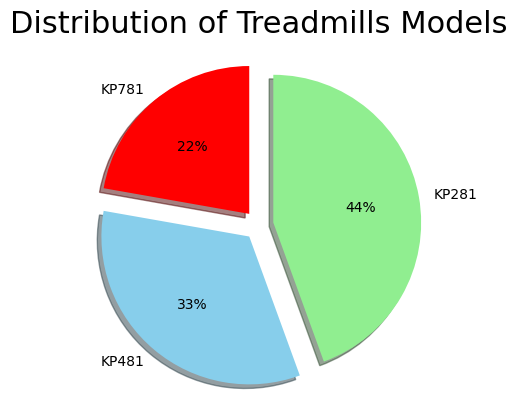

In [ ]:
labels = p_count.index
values = p_count.values
plt.title('Distribution of Treadmills Models', fontsize = 22)
plt.pie(values, labels=labels, autopct='%1.0f%%', explode=[0.1, 0.1, 0.1], shadow=True,
        startangle=90, counterclock=False, colors=['lightgreen', 'skyblue', 'red'])

KP281 is the most sold product followed by KP481 then KP781

In [ ]:
gender_count = data['Gender'].value_counts()
gender_count

Male      104
Female     76
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7c4144996a40>,
 [Text(-1.1643548485788247, -0.29030636677651794, 'Male'),
  Text(1.1643548213983763, 0.2903064757912845, 'Female')],
 [Text(-0.6792069950043144, -0.16934538061963544, '58%'),
  Text(0.6792069791490527, 0.1693454442115826, '42%')])

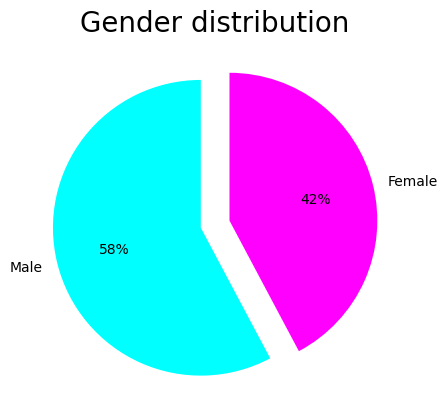

In [ ]:
labels = gender_count.index
values = gender_count.values
plt.title('Gender distribution', fontsize = 20)
plt.pie(values, labels=labels, explode = [0.1,0.1], autopct='%1.0f%%', colors=['cyan', 'magenta'], startangle=90)

Male customers have 58% share in data while Female Customers have only 42% share.


In [ ]:
marital_status_count = data['MaritalStatus'].value_counts()

([<matplotlib.patches.Wedge at 0x7c41445b8670>,
 [Text(-1.1475656969360848, -0.35084607909395, 'Partnered'),
  Text(1.1475656969360848, 0.3508460790939503, 'Single')],
 [Text(-0.669413323212716, -0.20466021280480412, '59%'),
  Text(0.669413323212716, 0.20466021280480434, '41%')])

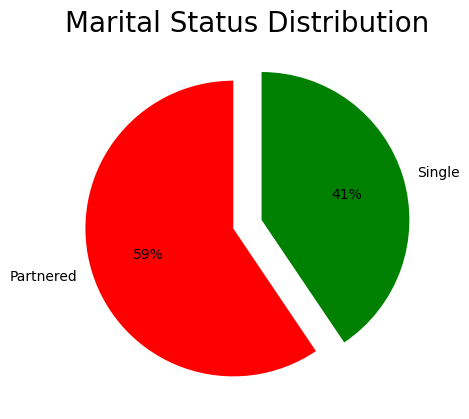

In [ ]:
labels = marital_status_count.index
values = marital_status_count.values
plt.title('Marital Status Distribution', fontsize = 20)
plt.pie(values, labels=labels, explode = [0.1,0.1], autopct='%1.0f%%',
        startangle=90, colors=['red', 'green'])


59% Customers are married while 41% customers are single.

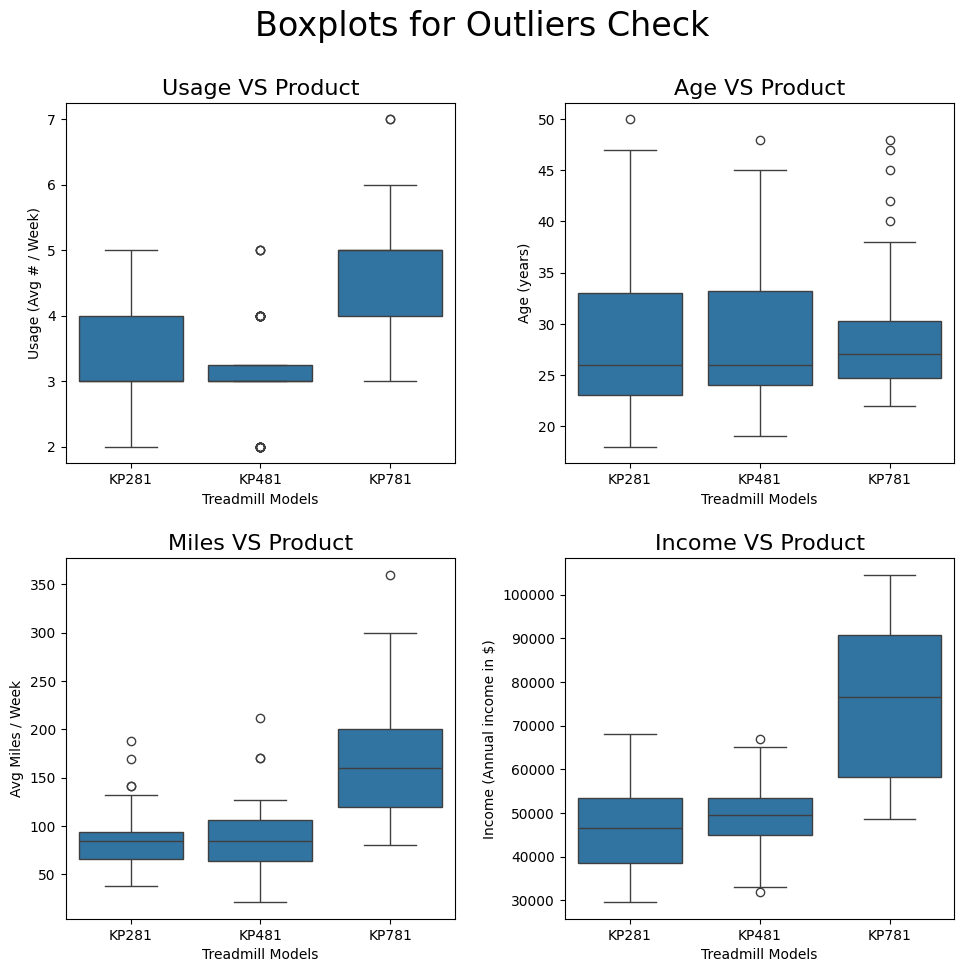

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('Boxplots for Outliers Check', fontsize = 24)


plt.subplot(2,2,1)
sns.boxplot(data, x="Product", y="Usage")
plt.xlabel('Treadmill Models')
plt.ylabel('Usage (Avg # / Week)')
plt.title('Usage VS Product', fontsize = 16)

plt.subplot(2,2,2)
sns.boxplot(data, x="Product", y="Age")
plt.xlabel('Treadmill Models')
plt.ylabel('Age (years)')
plt.title('Age VS Product', fontsize = 16)

plt.subplot(2,2,3)
sns.boxplot(data, x="Product", y="Miles")
plt.xlabel('Treadmill Models')
plt.ylabel('Avg Miles / Week')
plt.title('Miles VS Product', fontsize = 16)

plt.subplot(2,2,4)
sns.boxplot(data, x="Product", y="Income")
plt.xlabel('Treadmill Models')
plt.ylabel('Income (Annual income in $)')
plt.title('Income VS Product', fontsize = 16)



plt.tight_layout(pad=2.0)
plt.show()


## Graphical Analysis

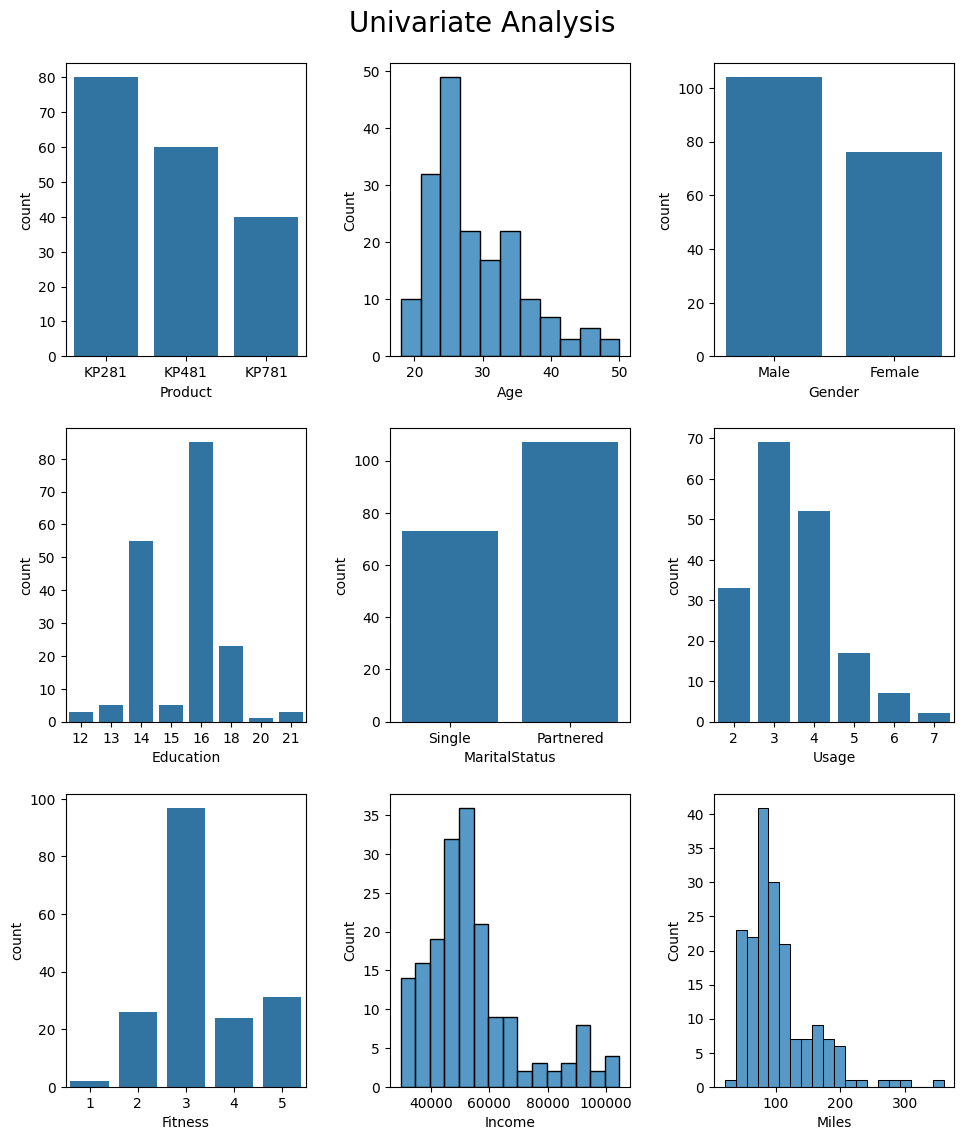

In [ ]:
plt.figure(figsize=(10,15))
plt.suptitle('Univariate Analysis', fontsize=20)

# Treadmill Model Counts
plt.subplot(4,3,1)
sns.countplot(data, x= 'Product')

# Age Count
plt.subplot(4,3,2)
sns.histplot(data, x= 'Age')

# Gender Count
plt.subplot(4,3,3)
sns.countplot(data, x= 'Gender')

# Education Count
plt.subplot(4,3,4)
sns.countplot(data, x= 'Education')

# Marital Status Count
plt.subplot(4,3,5)
sns.countplot(data, x= 'MaritalStatus')

# Usage Count
plt.subplot(4,3,6)
sns.countplot(data, x= 'Usage')

# Fitness Count
plt.subplot(4,3,7)
sns.countplot(data, x= 'Fitness')

# Income Count
plt.subplot(4,3,8)
sns.histplot(data, x= 'Income')

# Miles Count
plt.subplot(4,3,9)
sns.histplot(data, x= 'Miles')


plt.tight_layout(pad=2.0)

Some Observations

- Most treadmill users earn in the range of $40k/year - $60k/year
- Most treadmill users have 16 years of education

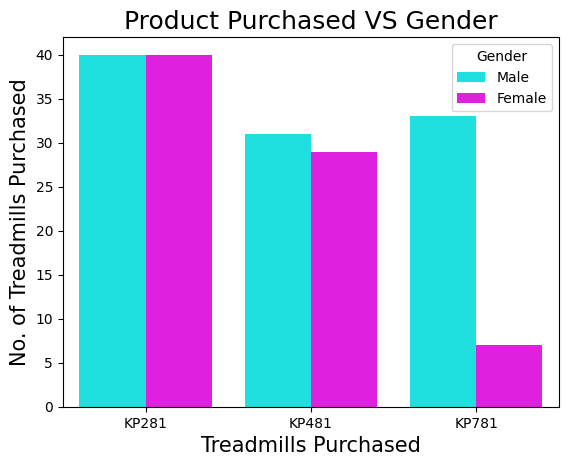

In [ ]:
custom_palette = ['cyan', 'magenta']

sns.countplot(data, x='Product', hue='Gender', palette=custom_palette)
plt.title('Product Purchased VS Gender', fontsize= 18)
plt.ylabel('No. of Treadmills Purchased', fontsize= 15)
plt.xlabel('Treadmills Purchased', fontsize= 15)

plt.show()

We see a general decline in females buying higher end product.

<ipython-input-72-ad7ecb545e3c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IncomeRange', y='Usage', data=mean_usage_by_income, palette='viridis')


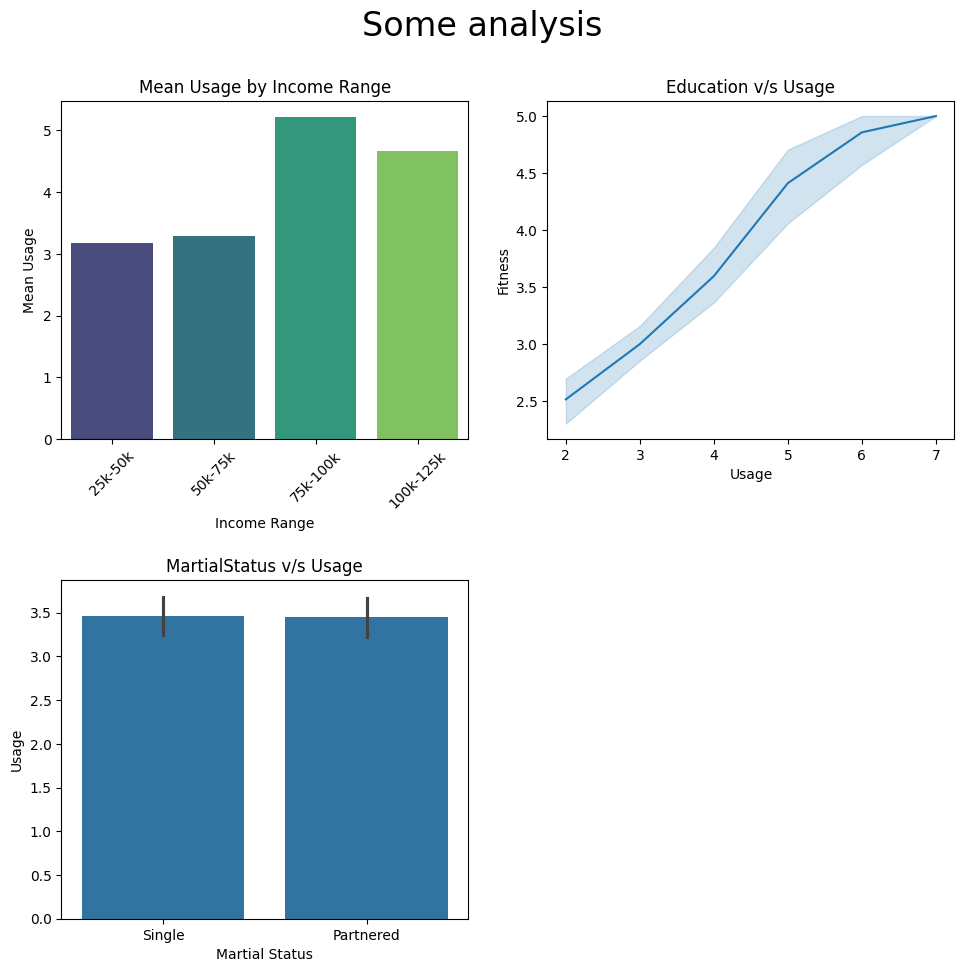

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('Some analysis', fontsize = 24)

income_bins = [25000, 50000, 75000, 100000, 125000]
income_labels = [ '25k-50k', '50k-75k', '75k-100k', '100k-125k']

data['IncomeRange'] = pd.cut(data['Income'], bins=income_bins, labels=income_labels)

mean_usage_by_income = data.groupby('IncomeRange')['Usage'].mean().reset_index()

plt.subplot(2, 2, 1)
sns.barplot(x='IncomeRange', y='Usage', data=mean_usage_by_income, palette='viridis')
plt.xlabel('Income Range')
plt.ylabel('Mean Usage')
plt.title('Mean Usage by Income Range')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.lineplot(data, x='Usage', y='Fitness')
plt.xlabel('Usage')
plt.ylabel('Fitness')
plt.title('Education v/s Usage')

plt.subplot(2,2,3)
sns.barplot(data, x='MaritalStatus', y='Usage')
plt.xlabel('Martial Status')
plt.ylabel('Usage')
plt.title('MartialStatus v/s Usage')




plt.tight_layout(pad=2.0)
plt.show()

- Higher income users tend to use the treadmill more.
- We observe an almost linear relation between education and usage.
- There is almost no relation between martial status and usage

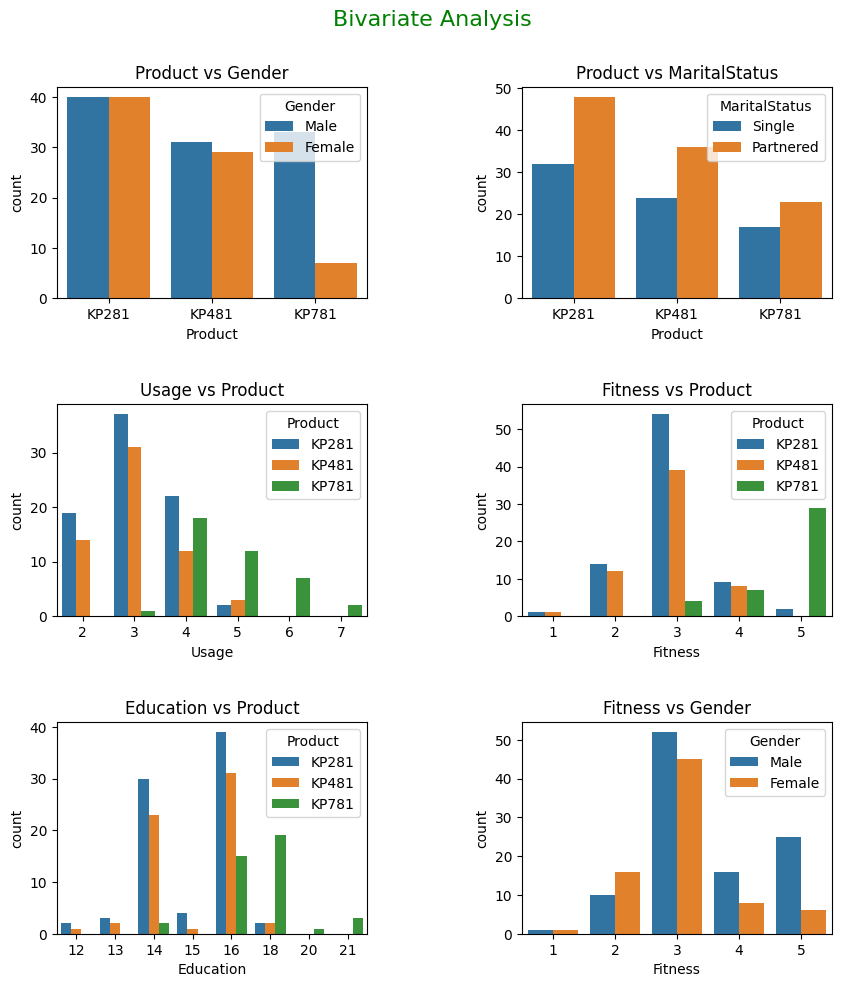

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(10,11))
fig.subplots_adjust(wspace=.5,hspace=.5)
fig.suptitle('Bivariate Analysis',y=.95,fontsize=16,color='green')

sns.countplot(data,x='Product',hue='Gender',ax=ax[0,0])
sns.countplot(data,x='Product',hue='MaritalStatus',ax=ax[0,1])
sns.countplot(data,x='Usage',hue='Product',ax=ax[1,0])
sns.countplot(data,x='Fitness',hue='Product',ax=ax[1,1])
sns.countplot(data,x='Education',hue='Product',ax=ax[2,0])
sns.countplot(data,x='Fitness',hue='Gender',ax=ax[2,1])


ax[0,0].set_title('Product vs Gender')
ax[0,1].set_title('Product vs MaritalStatus')
ax[1,0].set_title('Usage vs Product')
ax[1,1].set_title('Fitness vs Product')
ax[2,0].set_title('Education vs Product')
ax[2,1].set_title('Fitness vs Gender')

plt.show()

Some observations
- People with 16 years of education prefer to buy KP281
- People whose usage is more than 3 days a week prefer machine KP781
- People with more than 16 years of education prefer to use KP781


# Probability

In [ ]:
p_count=data['Product'].value_counts(normalize=True)
p_count

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [ ]:
product_gender_data = data[['Product','Gender']]
pd.crosstab(data['Product'], product_gender_data['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


- the P( Male buying KP781) => 33/104 => 31.7%
- the P( Male buying KP481) => 31/104 => 29.8%
- the P( Male buying KP281) => 40/104 => 38.4%

## Conditional Probability

In [ ]:
print("Probability (Product | Partnered)")
print(data[data["MaritalStatus"] == "Partnered"]["Product"].value_counts(normalize=True))

print("\nProbability (Product | Single)")
data[data["MaritalStatus"] == "Single"]["Product"].value_counts(normalize=True)


Probability (Product | Partnered)
KP281    0.448598
KP481    0.336449
KP781    0.214953
Name: Product, dtype: float64

Probability (Product | Single)


KP281    0.438356
KP481    0.328767
KP781    0.232877
Name: Product, dtype: float64

- Single users are most likely to buy KP781
- Partnered users are most likely to buy KP481.


In [ ]:
print("Probability (MaritalStatus | KP281)")
print(data[data["Product"] == "KP281"]["MaritalStatus"].value_counts(normalize=True))

print("\nProbability (MaritalStatus | KP481)")
print(data[data["Product"] == "KP481"]["MaritalStatus"].value_counts(normalize=True))

print("\nProbability (MaritalStatus | KP781)")
print(data[data["Product"] == "KP781"]["MaritalStatus"].value_counts(normalize=True))

Probability (MaritalStatus | KP281)
Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64

Probability (MaritalStatus | KP481)
Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64

Probability (MaritalStatus | KP781)
Partnered    0.575
Single       0.425
Name: MaritalStatus, dtype: float64


In [ ]:
print("\nProbability (Product | Single & Male)")
data[(data["MaritalStatus"] == "Single") & (data["Gender"]=="Male")]["Product"].value_counts(normalize=True)



Probability (Product | Single & Male)


KP281    0.441860
KP781    0.325581
KP481    0.232558
Name: Product, dtype: float64

In [ ]:
print(" \nProbability (Product | Single & Female)")
data[(data["MaritalStatus"] == "Single") & (data["Gender"]=="Female")]["Product"].value_counts(normalize=True)

 
Probability (Product | Single & Female)


KP481    0.466667
KP281    0.433333
KP781    0.100000
Name: Product, dtype: float64

In [ ]:
print("\nProbability (Product | Partnered & Male)")
data[(data["MaritalStatus"] == "Partnered") & (data["Gender"]=="Male")]["Product"].value_counts(normalize=True)


Probability (Product | Partnered & Male)


KP281    0.344262
KP481    0.344262
KP781    0.311475
Name: Product, dtype: float64

In [ ]:
print("\nProbability (Product | Partnered & Female)")
data[(data["MaritalStatus"] == "Partnered") & (data["Gender"]=="Female")]["Product"].value_counts(normalize=True)


Probability (Product | Partnered & Female)


KP281    0.586957
KP481    0.326087
KP781    0.086957
Name: Product, dtype: float64

# Observations

- Most sold Treadmill model is 'KP281' while the least sold Treadmill is 'KP781'
- Maximum Number of customers are in Age group of 20 to 30 Years.
- The Company has more number of Male customers than Female customers.
- Maximum Customers have 16 Years of Education while only few customers have 20 Years of Education
- Maximum Number of customers Lies between \$45k to $60k Income Group
- The company has more number of Partnered customers than Single Customers.
- Maximum Number of Customers use the Treadmill for 3 days a week.
- Most of the customers gave them a self rated Fitness score of 3 while only some customers gave them 1.
- Maximum number of customers walks/runs 94 miles/week on an average on Treadmills.


# Recomendations

### For **'KP281'**
- Both Male and Female customers are equally likely to buy the model.
- Company should target more Partnered customers than Single customers for 'KP281'.

### For **'KP481'**
- Both Male and Female customers are almost equally likely to buy 'KP481'. so, company should target both of them.
- Company should keep advertising this is a family product with a family as a cast to keep targetting partenered customers.

### For **'KP781'**
- Company should keep targetting single customers as that is where it is shining.
- Company should advertise this product with more female cast to promote it amongst women aswell.

